# 12 useful Data Manipulation Techniques using Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
loan = pd.read_csv("../Data_Science_Learning/Loan_Train.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape # number of rows and columns 

(614, 13)

In [5]:
loan.dtypes # data type of each variable which only returns the data type

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
loan.info() # Data types along with the count of non null elements in each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


# Null Values in a Dataset

In [7]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Columns containing null values
loan.columns[loan.isnull().any()].tolist()

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# 1. Boolean Indexing 

Filter values of a column based on conditions from another set of columns. For example here is a list of __unmarried male graduates who got a loan__.

In [9]:
loan.loc[(loan["Gender"]=="Male") & (loan["Education"]=="Graduate") & 
         (loan["Married"]=="No") & (loan["Loan_Status"]=="Y"), ["Gender","Education","Married","Loan_Status"]]

,Gender,Education,Married,Loan_Status
0,Male,Graduate,No,Y
4,Male,Graduate,No,Y
15,Male,Graduate,No,Y
38,Male,Graduate,No,Y
41,Male,Graduate,No,Y
72,Male,Graduate,No,Y
85,Male,Graduate,No,Y
88,Male,Graduate,No,Y
93,Male,Graduate,No,Y
101,Male,Graduate,No,Y


# 2. Apply Function

Apply returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [10]:
#Create a new function:
def missing_num(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(loan.apply(missing_num, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(loan.apply(missing_num, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
0    1
1    0
2    0
3    0
4    0
dtype: int64


# 3. Imputing missing files

__fillna()__ does it in one go. It is used for updating missing values with the overall mean/mode/median of the column. Let’s impute the __‘Gender’, ‘Married’__ and __‘Self_Employed’__ columns with their respective modes.

In [11]:
loan['Gender'].isnull().value_counts()

False    601
True      13
Name: Gender, dtype: int64

In [12]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

There are 13 null values in gender column and males are more in count. Lets impute the missing genders.

In [13]:
#First we import a function to determine the mode

from scipy.stats import mode
loan['Gender'].mode()

0    Male
dtype: object

This returns both mode and count. Remember that mode can be an array as there can be multiple values with high frequency. We will take the first one by default always using:

In [14]:
mode(loan['Gender'].astype('str')).mode[0]  # Version issue due to scipy 

C:\Users\SANTOSHSRINIVAS\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Male'

In [15]:
loan['Gender'].fillna(mode(loan['Gender'].astype('str')).mode[0], inplace=True)    
loan['Married'].fillna(mode(loan['Married'].astype('str')).mode[0], inplace=True)
loan['Self_Employed'].fillna(mode(loan['Self_Employed'].astype('str')).mode[0], inplace=True)  # Version warning

C:\Users\SANTOSHSRINIVAS\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [16]:
#checking the #missing values again to confirm:
print(loan.apply(missing_num, axis=0))

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
loan['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Hence, it is confirmed that missing values are imputed. Please note that this is the most primitive form of imputation.

# 4. Pivot Tables

Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is __“LoanAmount”__ which has missing values. We can impute it using mean amount of each __‘Gender’, ‘Married’ and ‘Self_Employed’__ group. The mean ‘LoanAmount’ of each group can be determined as:

In [18]:
#Determine pivot table
impute_grps = loan.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [19]:
gem_grps = loan.pivot_table(values=["LoanAmount"], index=["Gender","Education","Married"], aggfunc=np.median)
print(gem_grps)

                             LoanAmount
Gender Education    Married            
Female Graduate     No            112.0
                    Yes           127.0
       Not Graduate No             95.0
                    Yes           113.0
Male   Graduate     No            125.5
                    Yes           142.0
       Not Graduate No            110.0
                    Yes           121.5


# 5. Multi-indexing

If you notice the output of step #3, it has a strange property. Each index is made up of a combination of 3 values. This is called Multi-Indexing. It helps in performing operations really fast.

Continuing the example from #3, we have the values for each group but they have not been imputed.
This can be done using the various techniques learned till now.

In [20]:
#iterate only through rows with missing LoanAmount
for i,row in loan.loc[loan['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    loan.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

In [21]:
#Now check the #missing values again to confirm:
print(loan.apply(missing_num, axis=0))

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### Note:

1. Multi-index requires tuple for defining groups of indices in loc statement. This a tuple used in function.
2. The .values[0] suffix is required because, by default a series element is returned which has an index not matching with that of the dataframe. In this case, a direct assignment gives an error.

# 6. Crosstab

This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, __“Credit_History”__ is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below:

In [22]:
pd.crosstab(loan["Credit_History"],loan["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [23]:
pd.crosstab(loan["Gender"],loan["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


These are absolute numbers. But, percentages can be more intuitive in making some quick insights. We can do this using the apply function:

In [24]:
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(loan["Credit_History"],loan["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


Now, it is evident that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 9% without credit history.

But that’s not it. It tells an interesting story. Since I know that having a credit history is super important, what if I predict loan status to be Y for ones with credit history and N otherwise. Surprisingly, we’ll be right 82+378=460 times out of 614 which is a whopping 75%!

# 7. Merge DataFrames

Merging dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (price$ per sq foot) is available for different property types. Let’s define a dataframe as:

In [25]:
prop_rates = pd.DataFrame([250, 700, 1200], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,250
Semiurban,700
Urban,1200


Now we can merge this information with the original dataframe as:

In [26]:
data_merged = loan.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

Property_Area  rates
Rural          250      179.0
Semiurban      700      233.0
Urban          1200     202.0
Name: Credit_History, dtype: float64

The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.

# 8. Sorting DataFrames

In [27]:
data_sorted = loan.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


In [28]:
sorted_data = loan.sort_values(['LoanAmount','ApplicantIncome'], ascending=False)
sorted_data[['LoanAmount','ApplicantIncome']].head()

,LoanAmount,ApplicantIncome
171,700.0,51763
130,650.0,20166
155,600.0,39999
561,600.0,19484
369,570.0,19730


# 9. Plotting (Boxplot & Histogram)

Boxplots and histograms can be directly plotted in Pandas and calling matplotlib separately is not necessary. It’s just a 1-line command. For instance, if we want to compare the distribution of __ApplicantIncome by Loan_Status__:

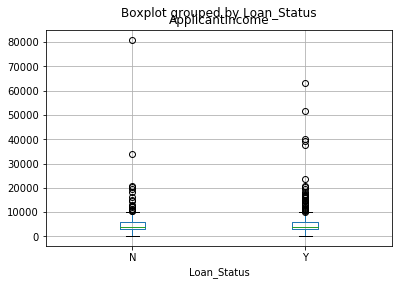

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
loan.boxplot(column="ApplicantIncome",by="Loan_Status")

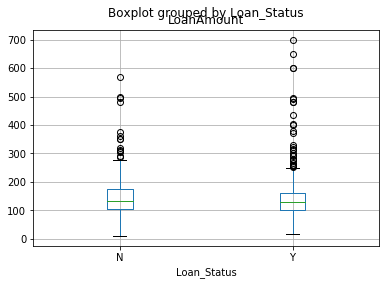

In [30]:
loan.boxplot(column="LoanAmount",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E11A770>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0E14CA50>], dtype=object)

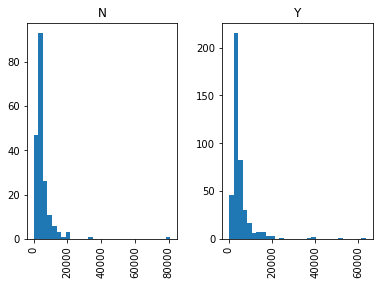

In [31]:
loan.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E1FFDB0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0E2BC6D0>], dtype=object)

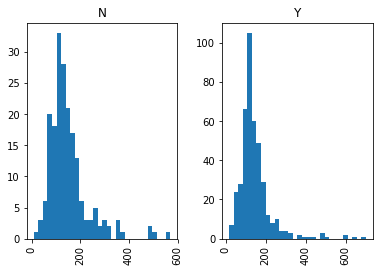

In [32]:
loan.hist(column="LoanAmount",by="Loan_Status",bins=30)

# 10. Cut function for binning

Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.

Here we define a simple function which can be re-used for binning any variable fairly easily.


In [33]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

#create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

#if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

#Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
loan["LoanAmount_Bin"] = binning(loan["LoanAmount"], cut_points, labels)
print(pd.value_counts(loan["LoanAmount_Bin"], sort=False))

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64


# 11. Coding Nominal Data

Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

1. Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
2. Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
3. Some categories might have very low frequencies and its generally a good idea to combine them.

Here I’ve defined a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.

In [34]:
# Generic function to relace
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print('Before Coding:')
print(pd.value_counts(loan["Married"]))
loan["Married_Coded"] = coding(loan["Married"], {'No':0,'Yes':1})
print('\nAfter Coding:')
print(pd.value_counts(loan["Married_Coded"]))

Before Coding:
Yes    401
No     213
Name: Married, dtype: int64

After Coding:
1    401
0    213
Name: Married_Coded, dtype: int64


# 12. Iterating over rows of a Dataframe

one common problem we face is the incorrect treatment of variables in Python. This generally happens when:

1. Nominal variables with numeric categories are treated as numerical.
2. Numeric variables with characters entered in one of the rows (due to a data error) are considered categorical.

So it’s generally a good idea to manually define the column types. If we check the data types of all columns:

In [35]:
loan.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Married_Coded           int64
dtype: object

Here we see that __Credit_History is a nominal variable but appearing as float__. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types. For instance, here I have created a csv file __datatypes.csv.__

In [36]:
#Load the file:
colTypes = pd.read_csv("../Data_Science_Learning/datatypes.csv")
print(colTypes)

              feature         type
0              Gender  Categorical
1             Married  Categorical
2          Dependents  Categorical
3           Education  Categorical
4       Self_Employed  Categorical
5     ApplicantIncome   Continuous
6   CoapplicantIncome   Continuous
7          LoanAmount   Continuous
8    Loan_Amount_Term   Continuous
9      Credit_History  Categorical
10      Property_Area  Categorical
11        Loan_Status  Categorical


After loading this file, we can iterate through each row and assign the datatype using column ‘type’ to the variable name defined in the ‘feature’ column.

In [37]:
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        loan[row['feature']] = loan[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        loan[row['feature']] = loan[row['feature']].astype(np.float)
print(loan.dtypes)

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Married_Coded           int64
dtype: object


Now the credit history column is modified to ‘object’ type which is used for representing nominal variables in Pandas.